# Bike sharing Case Study

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

###### Goals :

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

###### Steps involved in Solving this Case Study:
- Step 1: Importing important/usefull Libraries for solving this casestudy
- Step 2: Reading the Data
- Step 3: Visualising and Understanding the data(EDA)
- Step 4: Data Preparation
- Step 5: Splitting the Data into Training and Testing Data Sets
- Step 6: Building a linear model
- Step 7: Residual Analysis of the train data
- Step 8: Making Predictions Using the Final Model
- Step 9: Model Evaluation
- Conclusion:


##  Step 1: Importing important/usefull Libraries

In [1]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

##  Step 2: Reading the Data

In [2]:
# Reading the data set:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Getting insights of dataframe:
data.shape

(730, 16)

In [4]:
# Getting description of the data in the dataframe:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Getting descriptive insights of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no Null values in the column and majority of data are having numerical values except date coumn.

In [6]:
# Checking for any duplicate entries:
data.duplicated().sum()

0

- There are no duplicate entries found in the dataset

Insights:

- `instant` column is a record index which does not have any significance in out analysis. So we will drop the column
- We are going to use `weekday` varible which is derived from `dteday`, so we will not be using `dteday` and will drop it.
- `casual` + `registered` = `cnt`

In [7]:
#Droping the instant column as it is just having index number of the dataset:
data.drop(['instant'],axis=1,inplace=True)

In [8]:
#We already have weekday month columns so we can drop the dteday column:
data.drop(['dteday'],axis=1,inplace=True)

In [9]:
# casual + registered = cnt
data.drop(columns=['casual', 'registered'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [10]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# After droppping the variables checking the columns abnd rows in the dataframe
data.shape

(730, 14)

In [12]:
# summary statistics of numerical variables
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


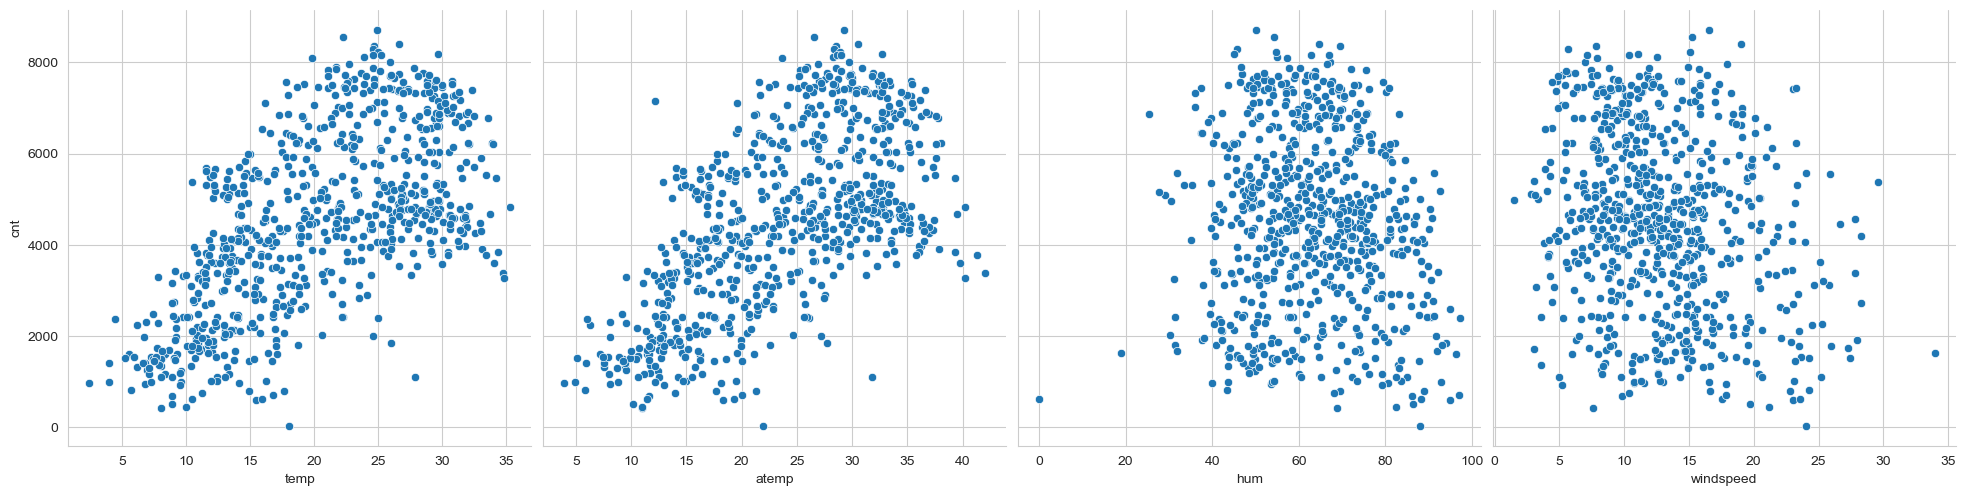

In [13]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- adjusted temperature and temperature have similar trends
- temp vs cnt has two outliers between 15 and 30
- atemp vs cnt has two outliers between 20 and 35
- hum vs cnt has two outliers below 20
- windspeed vs cnt has one outlier above 30

## Outliers in Continuous Variables vs cnt

In [14]:
## Dropping outliers in continuous variables
# outliers in temp
data = data.drop(index = data[(data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000)].index)


# outliers in atemp
data = data.drop(index = data[(data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000)].index)


#outliers in hum
data = data.drop(index = data[(data['hum'] < 20)].index)

#outliers in windspeed
data = data.drop(index = data[(data['windspeed'] > 30)].index)

In [15]:
# Looking at correlation with continuous variables 
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


- `adjusted temperature` has the highest positive correlation with `cnt` followed by `temperature`.
- `hum` has the lowest correlation.

In [16]:
# correlation between ```temp``` and ```atemp```
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


- Since, the correlation between temp and atemp is almost 1, one of them could be dropped.
- atemp represents adjusted temperature which is an indicator of how hot it actually feels like which is a compound measure of temperature,humidity and windspeed. Ref : UK Meteorological Dept
- atemp might cause bias in data because it's a compound variable, Instead we could use temp , hum , windspeed. Hence , dropping atemp. Also it makes business sense to keep temp and calcuate adjusted temperature from it.

In [17]:
# dropping ```atemp```
data = data.drop(columns=['atemp'])

In [18]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


- There's no signifcant correlation between atemp and hum , windspeed.
- Hence these are not dropped for now.

## Step 3: Visualising and Understanding the Data (EDA)

In [19]:
# Converting variables into categorical type 
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [20]:
# Unique values in each categorical variable / [To check for disguised missing values]
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


- No disguised missing values exist

In [21]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,331,654,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,131,670,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,82,1518,1600


In [22]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

- From the season vs rentals per day plot , fall has the highest average rentals followed by summer.
- Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.
-  the month wise plot, September has the highest rentals, followed by the two months surrounding it. It seems like the trend is explained by seasonal rentals too
- Holidays show lower rental count compared to working days, with greater variability in demand on holidays.
- There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.

## Outliers in Categorical Variables vs cnt

In [23]:
# Dropping outliers in Categorical Variables 
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)

**`Function to check the Nulls:`**

In [24]:
# Creating a function to find the total null count and null percentage 

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [25]:
find_NaN(data)

,Cnt_of_Nulls,Null_Percentage
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0
hum,0,0.0
windspeed,0,0.0


**`(A.) Visualising Numeric Variables:`**

In [26]:
#Lets first Define Function Univariate.
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

##### Analysis on Column: cnt

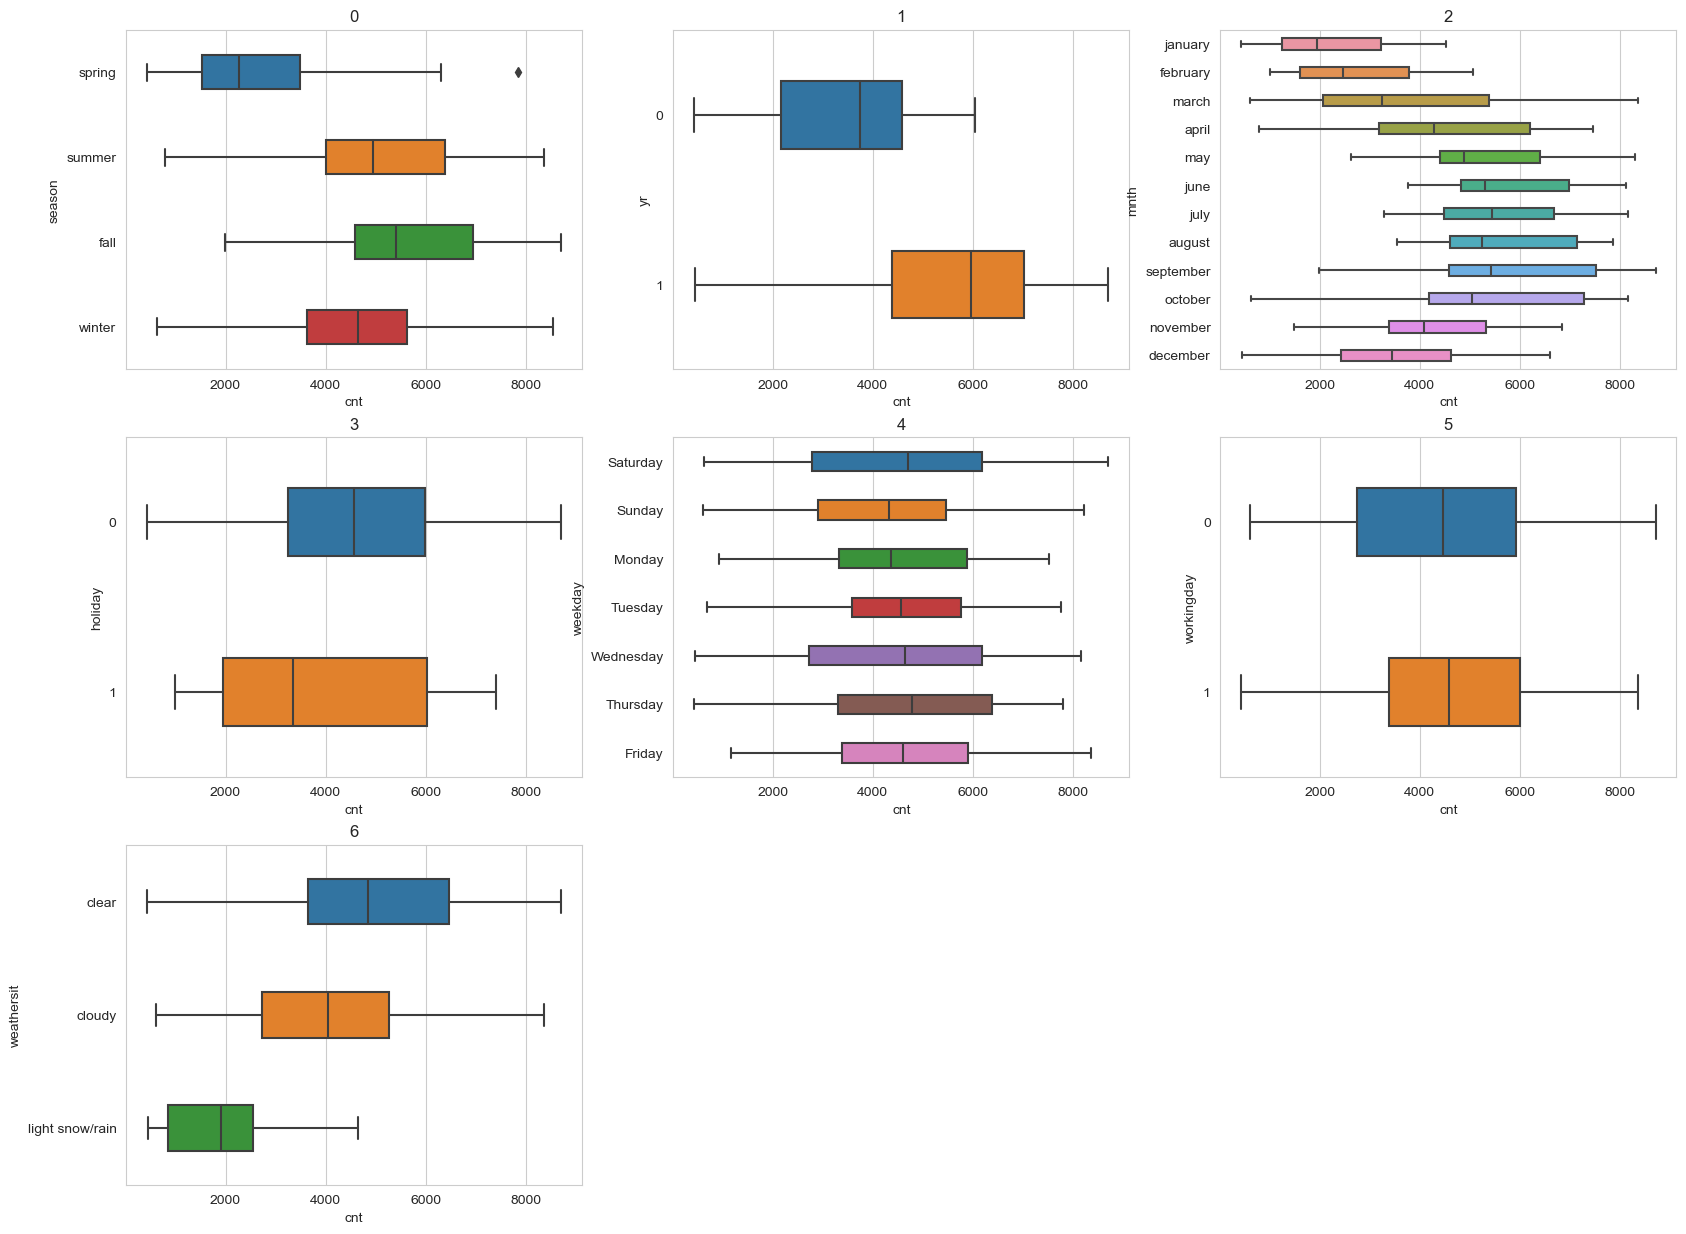

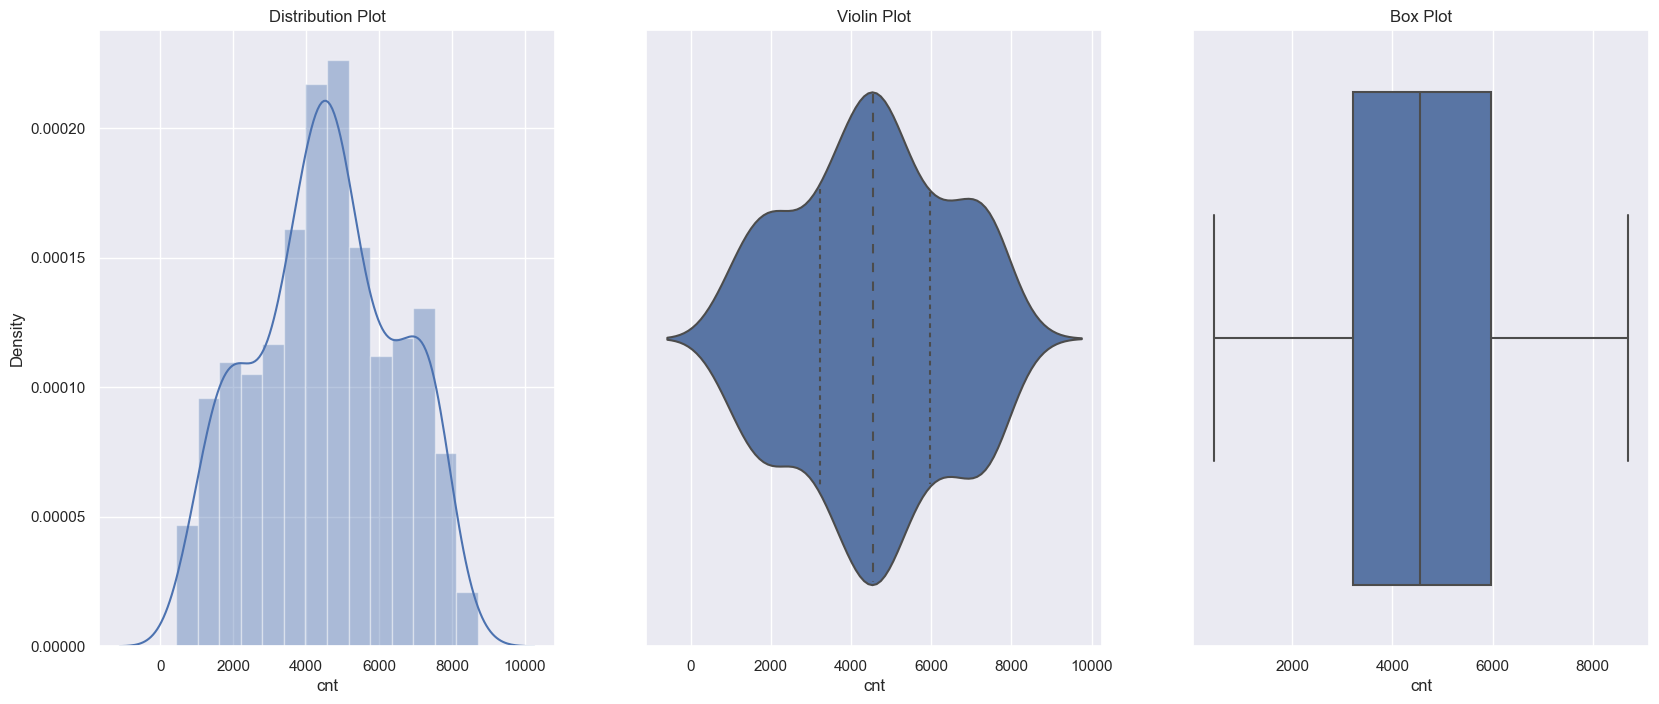

In [27]:
#Lets carry out Univariate analysis on cnt
univariate(df=data,col='cnt')

##### Inference - Data is normally distributed bet ween 0 to 10000, mean is 4500

In [28]:
# The target variable(cnt) is the sum of the both registered and casual columns, 
# So these columns are not usefull to predict target variable we can drop these columns
# Also to avoid multicollinearity we delete the columns 'casual' and 'registered':
data.drop(['casual','registered'],axis=1,inplace=True)

#####  Analysis on Column: windspeed

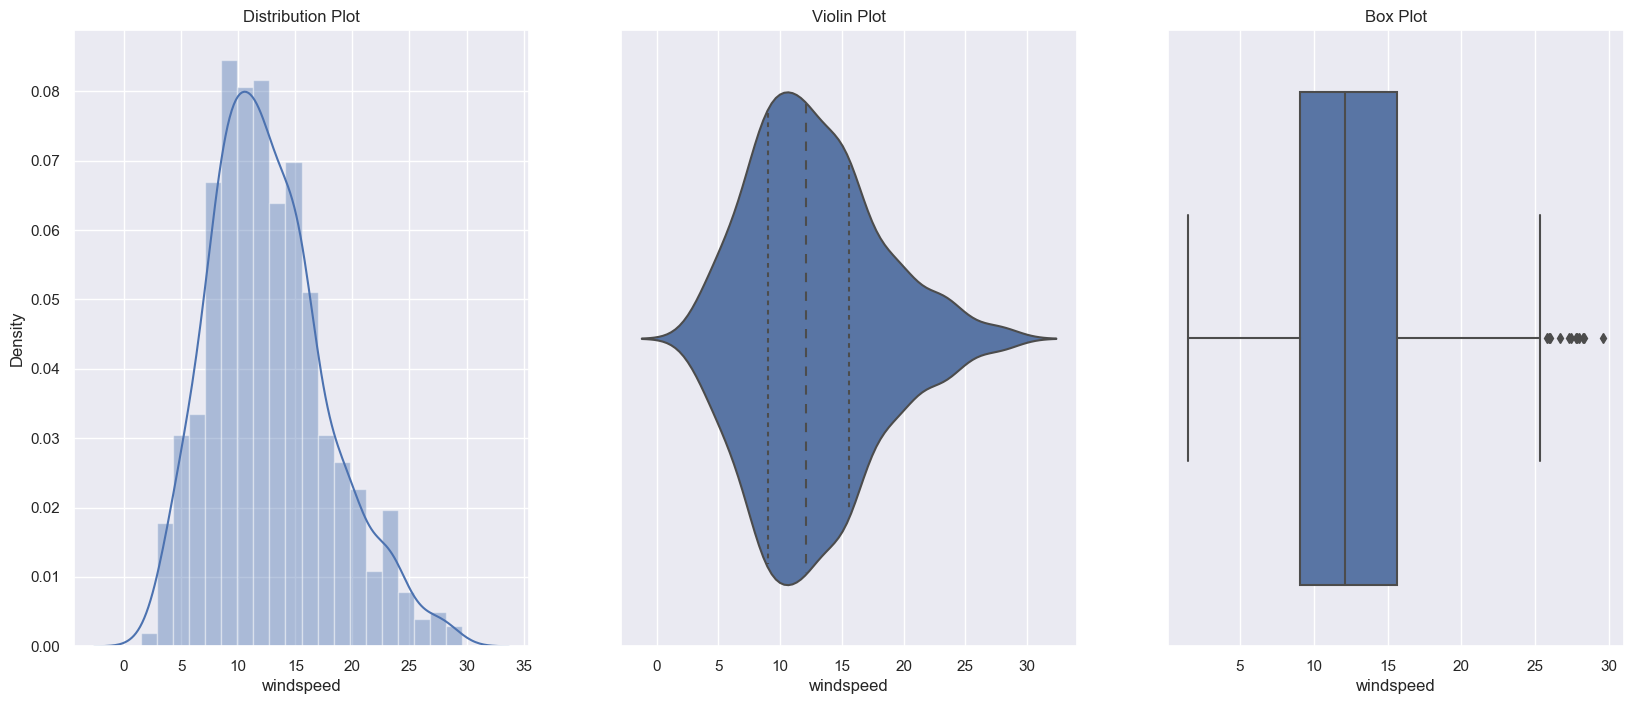

In [29]:
#Lets carry out Univariate analysis on windspeed
univariate(df=data,col='windspeed')

##### Inference - windspeed column is normally distributed between 1 to 30 with mean of 12

#####  Analysis on Column: hum

In [30]:
data.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985


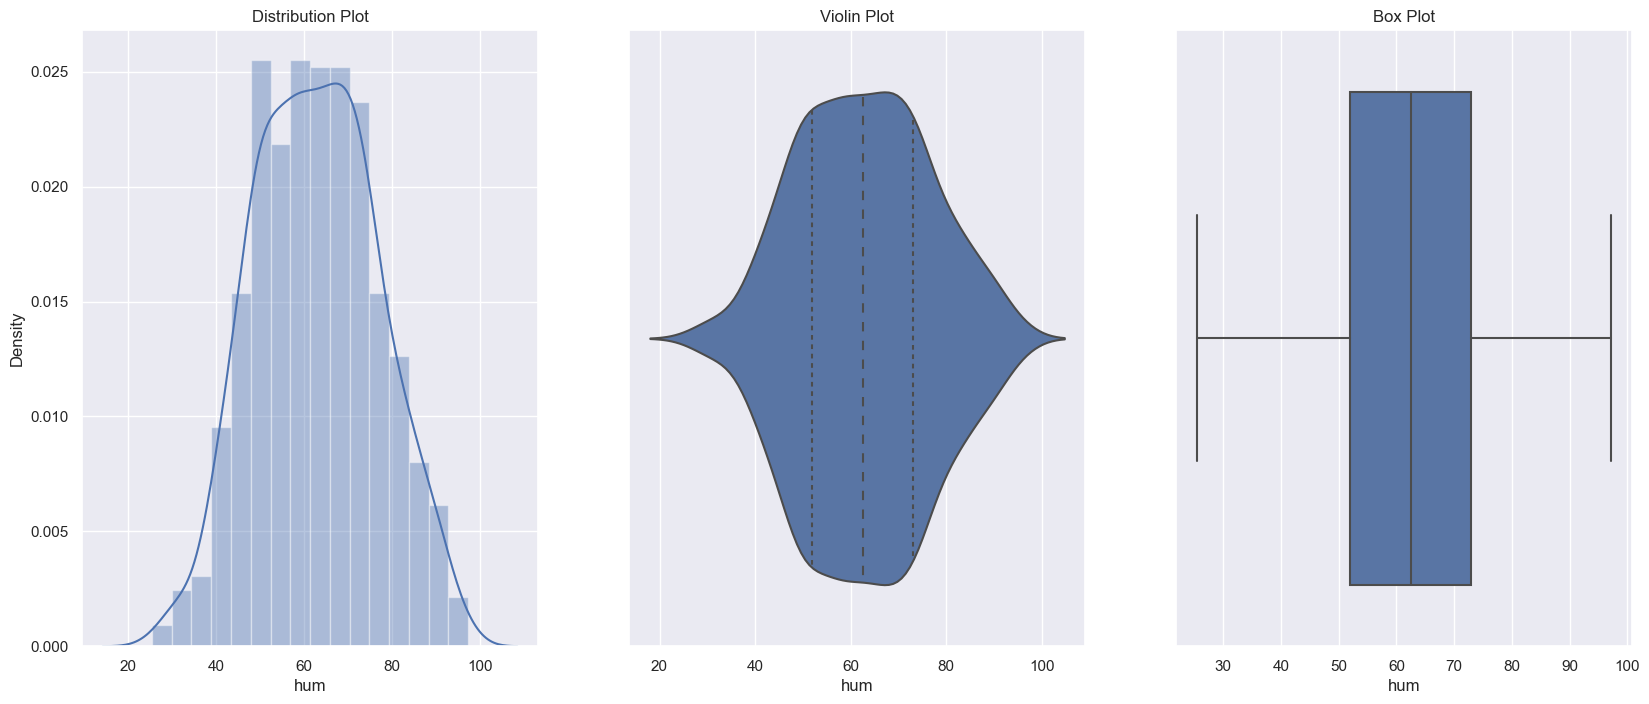

In [31]:
#Lets carry out Univariate analysis on hum
univariate(df=data,col='hum')

##### Inference - humudity column data is right skewed normal distribution with mean of 62

##### Inference - Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable.

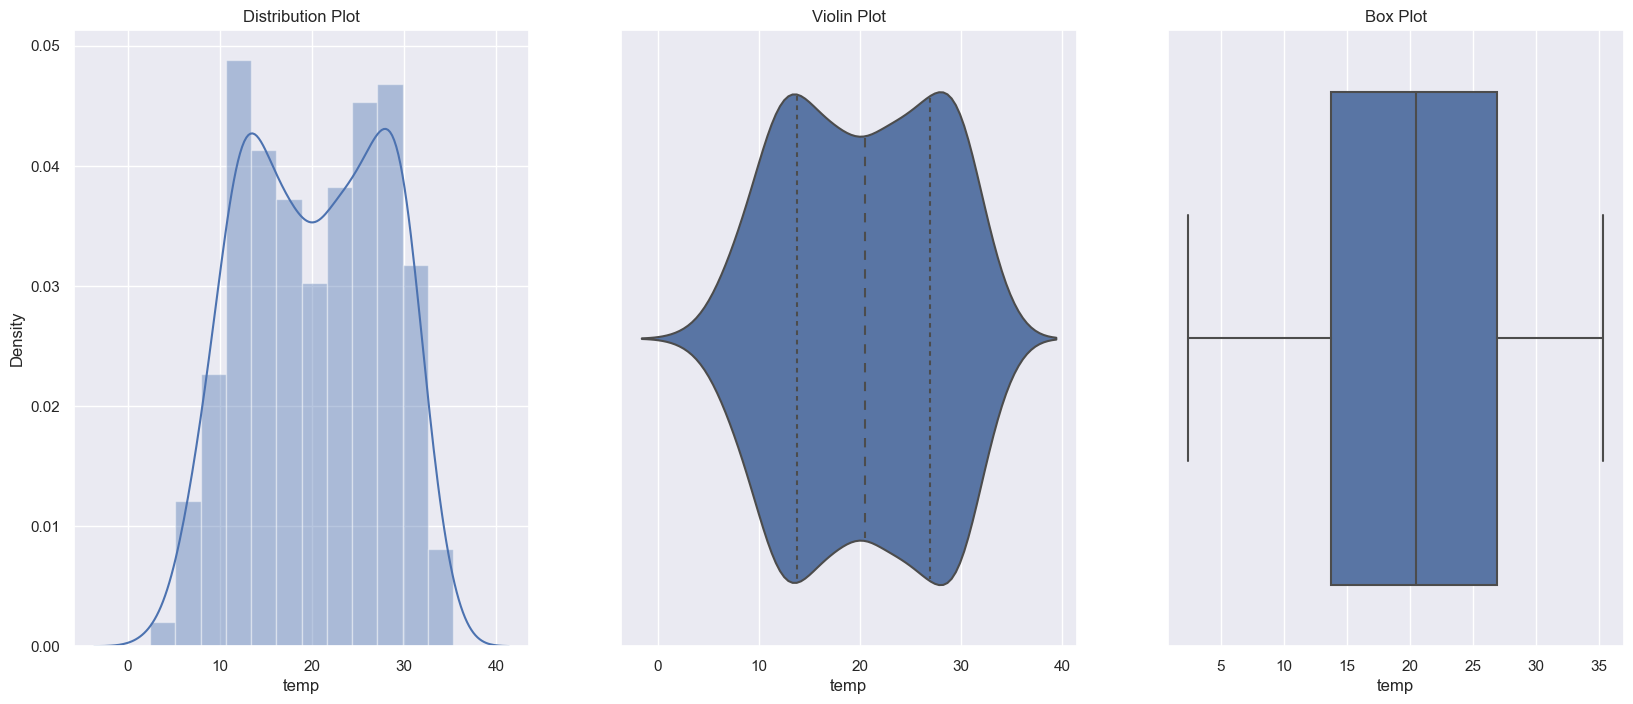

In [32]:
#Lets carry out Univariate analysis on temp
univariate(df=data,col='temp')

##### Inference - temp column data is right skewed normal distribution with mean of 20

### Correlation Matrix and Heat Map

In [33]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


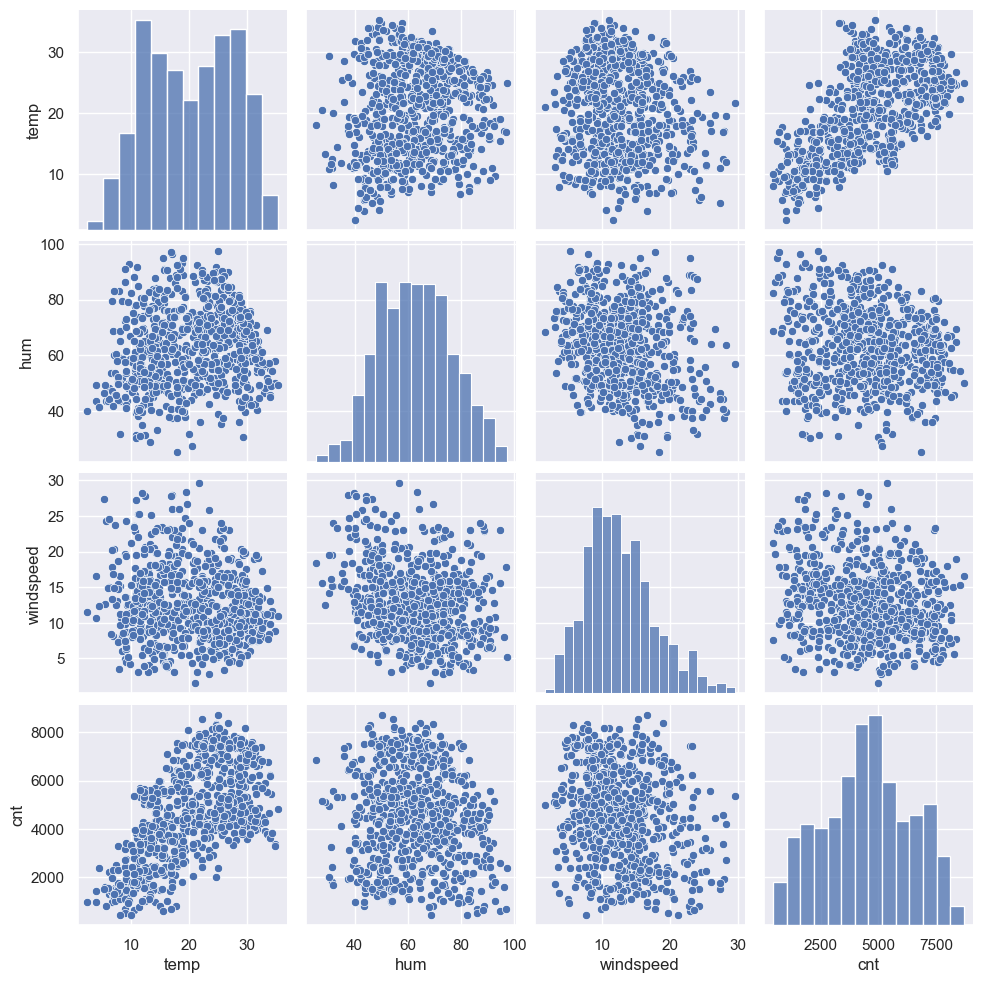

In [34]:
sns.pairplot(data[['temp','hum','windspeed','cnt']])
plt.show()

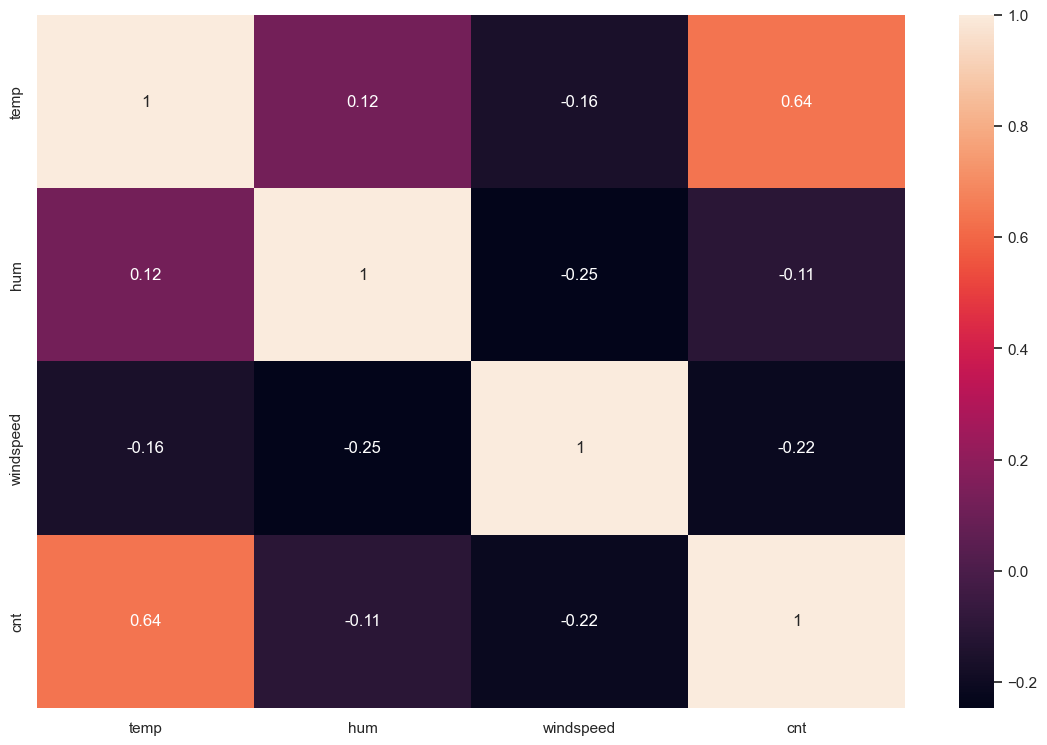

In [35]:
corr_df= data[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

In [36]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap='GnBu',center=0,annot=True)

<AxesSubplot:>

**`(B.) Visualising Categorical  Variables:`**

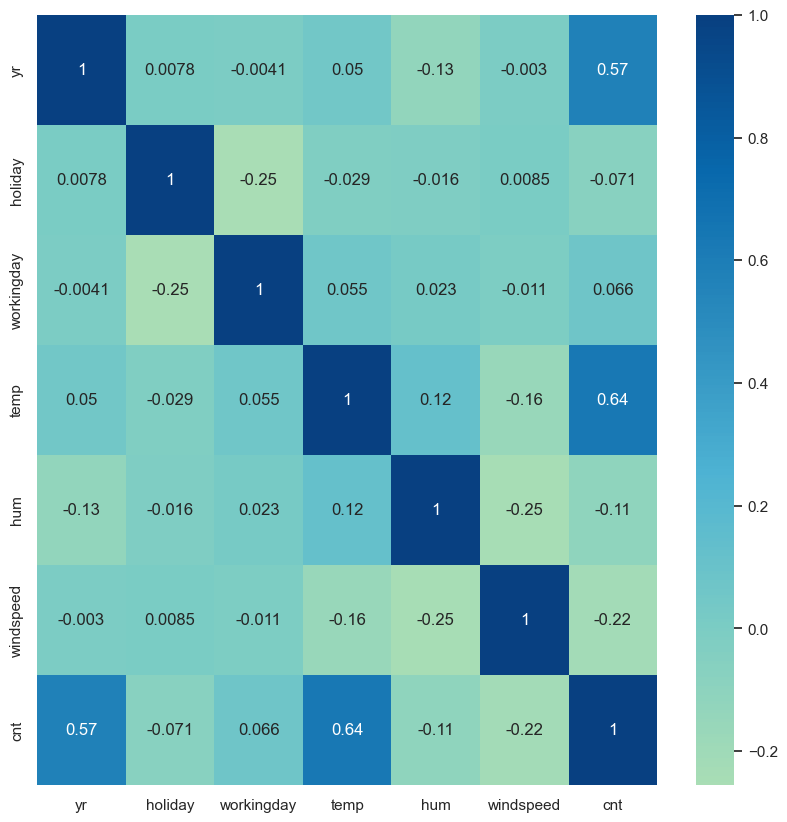

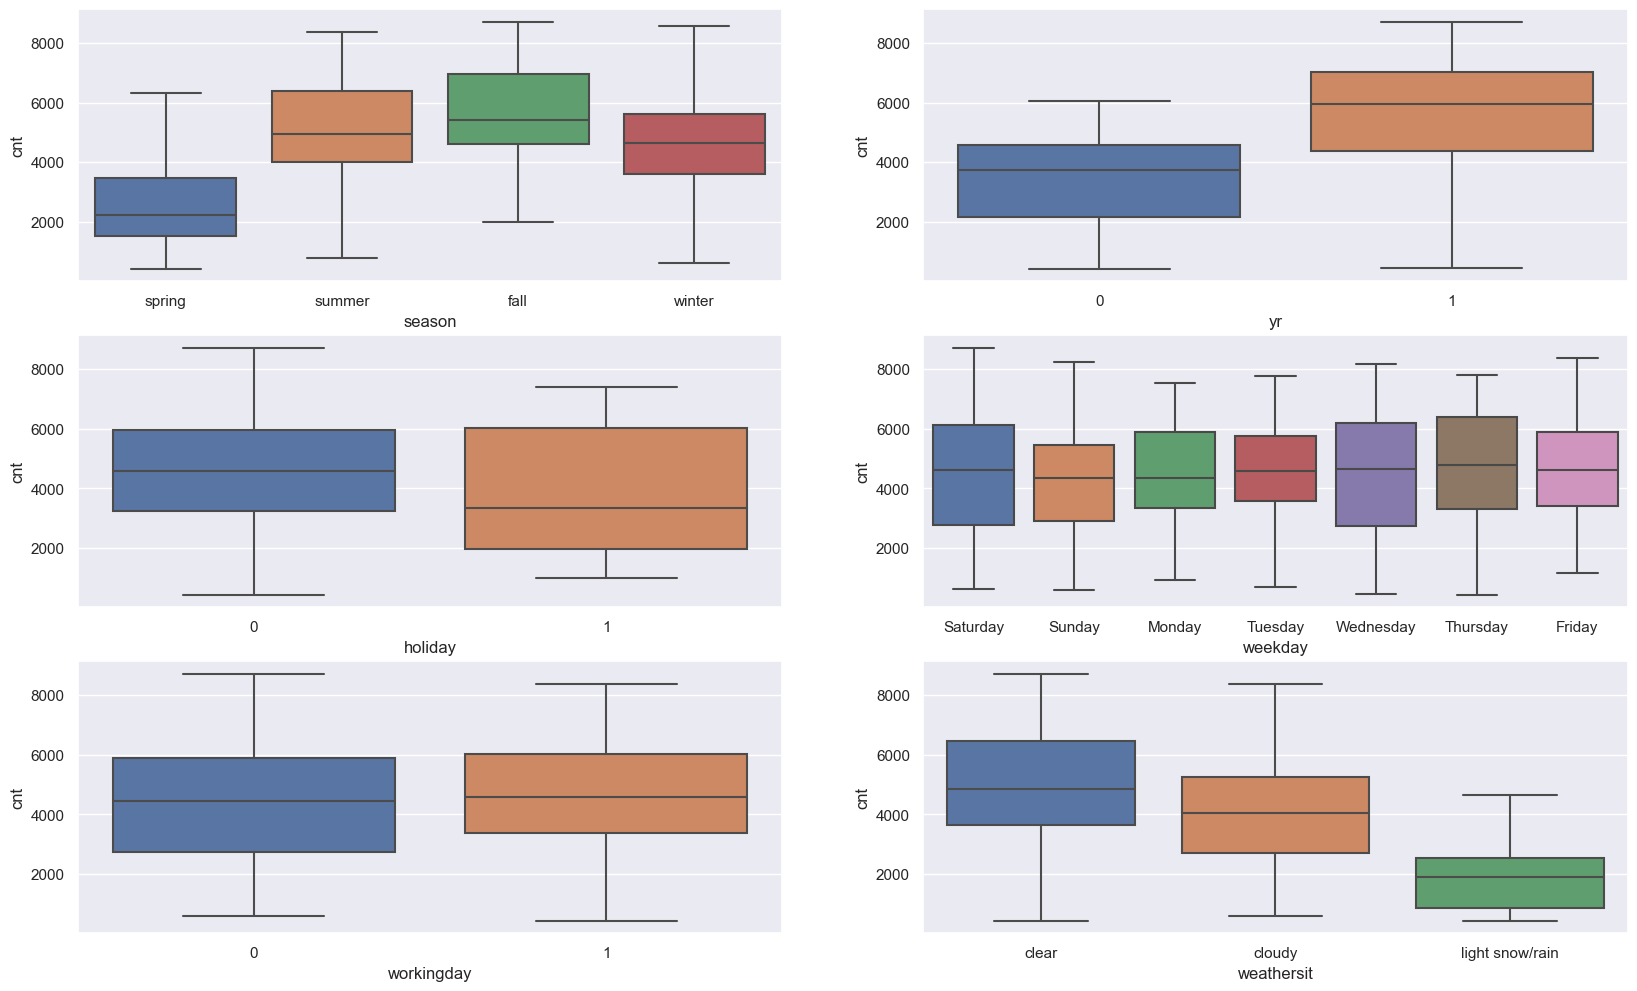

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

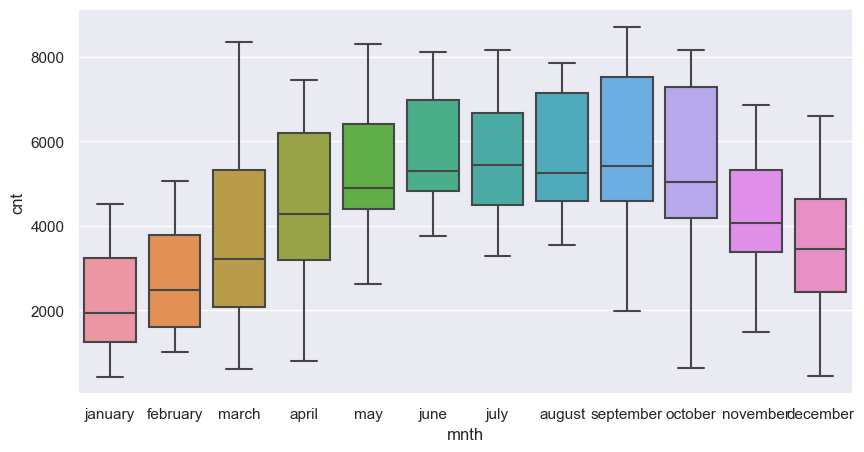

In [38]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.show()

In [39]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [40]:
data.shape

(724, 11)

##  Step 4: Data Preparation:

### Creating Indictor Variables

In [41]:
# creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [42]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [43]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

##  Step 5: Splitting the Data into Training and Testing Sets:

In [45]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

## Scaling Numerical Features

In [46]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

### X_train , y_train

In [47]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [48]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [49]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,february,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,0,0.795440,0.584687,0.155696,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
107,0,0,1,0.564921,0.401392,0.303720,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
595,1,0,0,0.718600,0.636891,0.110569,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

## Step 6: Building a linear model:

Approach

- A mixed approach is followed.
- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.

### Recursive Feature Elimination

In [51]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [52]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
17,1,True,october
16,1,True,september
14,1,True,july
8,1,True,winter
27,1,True,light snow/rain
6,1,True,summer
1,1,True,holiday


In [53]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'october', 'september', 'july',
       'winter', 'light snow/rain', 'summer', 'holiday', 'workingday',
       'fall', 'hum', 'windspeed', 'temp'], dtype=object)

### Manual Elimination

In [54]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

### Model 1
- Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [55]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.60e-190
Time:                        22:19:43   Log-Likelihood:                -4067.5
No. Observations:                 506   AIC:                             8165.
Df Residuals:                     491   BIC:                             8228.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1246.4780    142.377     

### Model 2 :
- Dropping holiday because of high p-value

In [56]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.60e-190
Time:                        22:19:43   Log-Likelihood:                -4067.5
No. Observations:                 506   AIC:                             8165.
Df Residuals:                     491   BIC:                             8228.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1104.4182    250.041     

### Model 3 :
- Dropping Sunday because of high p-value

In [57]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.51e-190
Time:                        22:19:43   Log-Likelihood:                -4069.4
No. Observations:                 506   AIC:                             8167.
Df Residuals:                     492   BIC:                             8226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1418.1030    188.380     

### Model 4
- Dropping `january` because this information might also be contained in `winter`.

In [58]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.51e-190
Time:                        22:19:43   Log-Likelihood:                -4069.4
No. Observations:                 506   AIC:                             8167.
Df Residuals:                     492   BIC:                             8226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1418.1030    188.380     

### Model 5
- Dropping `december` because this information might also be contained in `winter`.

In [59]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.51e-190
Time:                        22:19:43   Log-Likelihood:                -4069.4
No. Observations:                 506   AIC:                             8167.
Df Residuals:                     492   BIC:                             8226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1418.1030    188.380     

### Model 6
- Dropping `november` because this information might also be contained in `winter`.

In [60]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.51e-190
Time:                        22:19:43   Log-Likelihood:                -4069.4
No. Observations:                 506   AIC:                             8167.
Df Residuals:                     492   BIC:                             8226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1418.1030    188.380     

### Verifying MultiCollinearity

In [61]:
vif(X_train[selected_features])

              index        vif
0             const  30.839173
10             fall   5.469463
13             temp   3.816930
8            summer   2.727732
6            winter   2.169456
9        workingday   1.613664
2          Saturday   1.610634
5              july   1.592252
3           october   1.531265
4         september   1.367748
11              hum   1.334757
7   light snow/rain   1.182865
12        windspeed   1.165639
1                yr   1.032661


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

### Final Modle

In [62]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.51e-190
Time:                        22:19:44   Log-Likelihood:                -4069.4
No. Observations:                 506   AIC:                             8167.
Df Residuals:                     492   BIC:                             8226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1418.1030    188.380     

- 10 features have been selected.
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 4.89e-187
- The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

## Step 7: Residual Analysis of the train data:

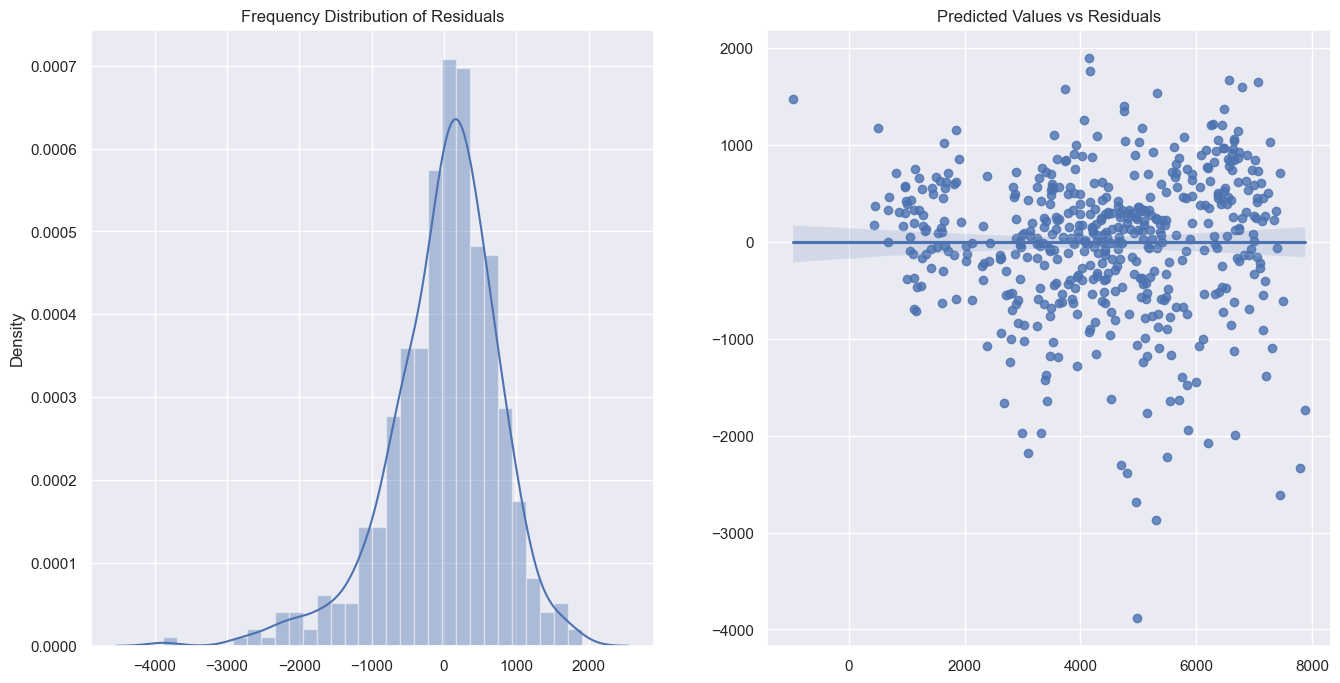

In [63]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [64]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-2.7183736157980878e-12

- Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

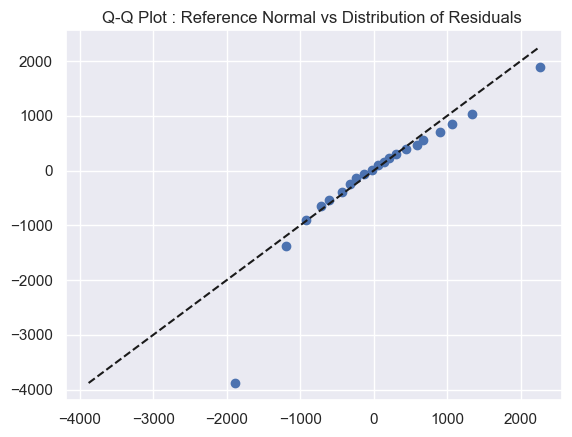

In [65]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

- This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

In [66]:
# lag plot to assess independence of data points
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
    
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

- Lagplot of residuals shows no trend. Hence the error terms have constant variance
#### Hence, assumptions of Linear Regression are satisfied by this model

##  Step 8: Making Predictions Using the Final Model:

In [67]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [68]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

## Step 9: Model Evaluation:

##### Let's now plot the graph for actual versus predicted values.

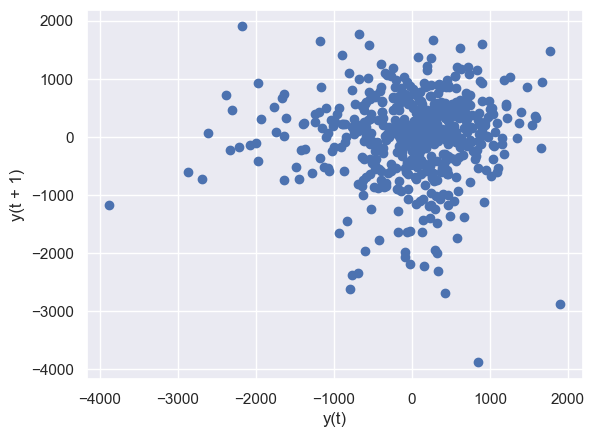

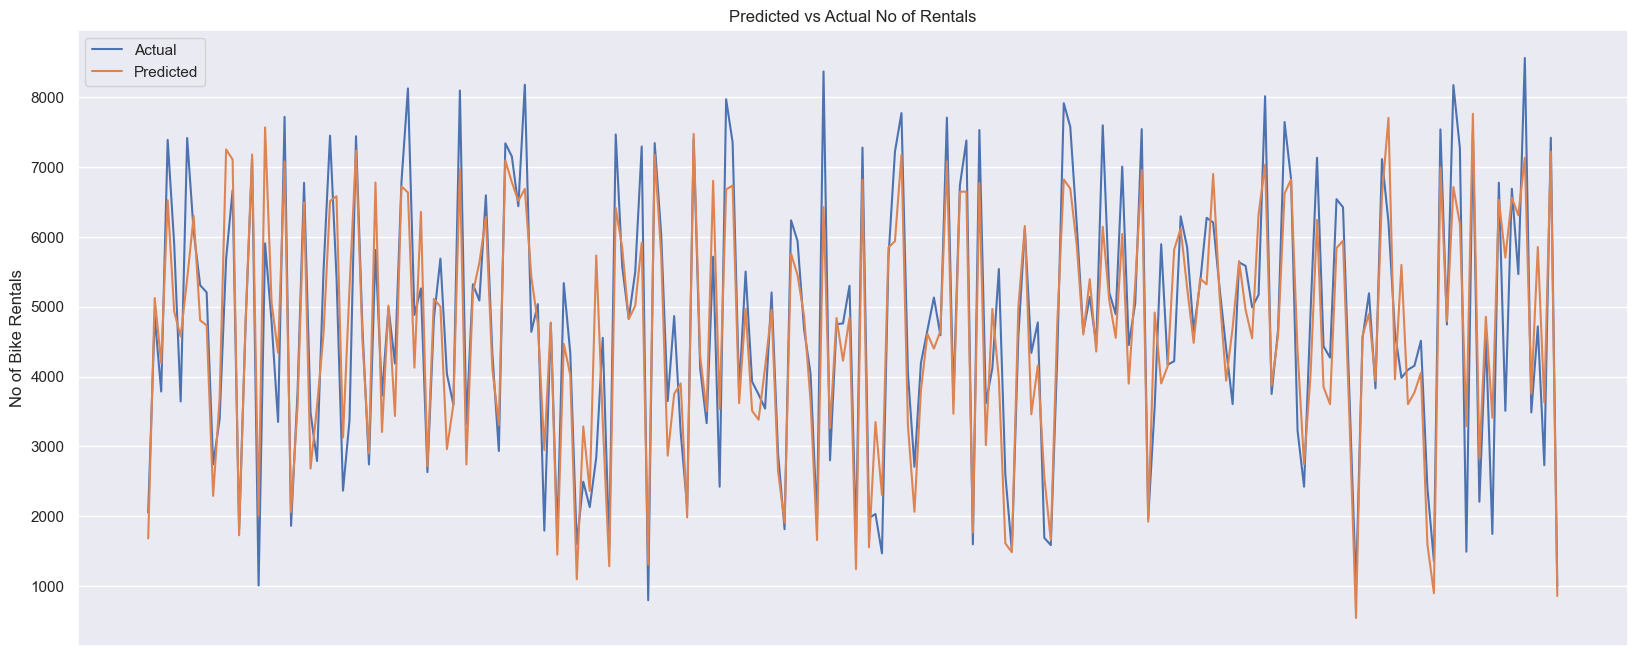

In [69]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

- Predicted vs observed value plots shows that the model is reasonably accurate.

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.83
Mean Squared Error 620707.347


### Model Stability

In [71]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.8015124 , 0.90352946, 0.75317277, 0.8809412 , 0.84977178,
       0.85148136, 0.87604444, 0.70916161, 0.72507205, 0.88448103])

In [72]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.14)


In [73]:
selected_features

array(['yr', 'Saturday', 'october', 'september', 'july', 'winter',
       'light snow/rain', 'summer', 'workingday', 'fall', 'hum',
       'windspeed', 'temp'], dtype=object)

### Top Features

In [74]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [1418.10302692]


,MLR Coefficients
temp,4419.436785
yr,1949.020794
winter,1297.473381
summer,1130.991307
fall,814.665167
september,657.851145
october,580.443526
Saturday,455.736638
workingday,334.975674
july,-617.279736


- Upon standardized the values of predictor variables, the above shows that the top features influencing demand are `temp`, followed by `yr` and `hum`
- In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by `xxx`, when all other modelled paramters are held unchanged.
- In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is `xxx`, when all other modelled paramters are held unchanged.

# Conclusion:

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 10 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. `Final Model` built on training data set explains 85% of the variability and achieves 83% on test data.
The final relationship between demand and predictors is as follows.
- `yr-` + 1949.0207 `Saturday-` + 455.7366  `winter-`+1297.4733  `july-`-617.2797  `workingday-`+334.9756  `hum-`-1939.0615   `temp-` + 4419.4367 `windspeed-` -1142.9442 `light snow/rain-` -1236.0622

where `temp` , `windspeed` and `hum` are normalized.

Note :

- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects.
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
- Further Lag plot shows there is no auto-correlation in data.
- Model is stable at 82%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values.